In [2]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
import yfinance as yf

### Regressions: what factors cause variations in prices of SOL

In [397]:
sol_pr = yf.download('SOL-USD',period='36mo',ignore_tz=True)
sol_pr['Date']=sol_pr.index
sol_pr['Date'] = pd.to_datetime(sol_pr['Date']).dt.date
sol_pr.set_index('Date', inplace=True)
sol_pr['Sol_Price']=sol_pr['Adj Close'].pct_change()
sol_pr=sol_pr[['Sol_Price']]

[*********************100%***********************]  1 of 1 completed


In [59]:
# Matching with Var that Bailee used by adding ('ACWI' 'Gold''Oil''DBC' 'TPINX') 
#Changing GOLD to GLD


#Equity: ACWI MSCI*
#Bonds Alternative: Templeton Global Bond Fund (TPINX) 
#Commodities:DBC, S&P-GSCI Commodity Index Future (GD=F)
#Market Volatility: VIX
#Credit:. Fidelity Global Credit Fund (FGBFX)
#Emg Mkts:
#- EM Equity: MSCI Emerging Markets Net Return Index,  ACWI
#- EM Net Total Return: The MSCI Emerging Markets (EM) Net Total Return Index
#USD Inflation: GOLD OIL CPI*

In [60]:
# Taking Richard's suggestionsa and added 
#ICE BofA High Yield US Emerging Markets Liquid Corporate Plus Index Option-Adjusted Spread)
#Moody's Seasoned Baa Corporate Bond Yield Relative to Yield on 10-Year Treasury Constant Maturity

In [433]:
#VIX

VIX= yf.download('^VIX',period='36mo',ignore_tz=True)
VIX['Date']=VIX.index
VIX['Date'] = pd.to_datetime(VIX['Date']).dt.date
VIX.set_index('Date', inplace=True)
VIX['VIX']=VIX['Adj Close'].pct_change()
VIX=VIX[['VIX']]

[*********************100%***********************]  1 of 1 completed


In [286]:
#Bonds Alternative: Templeton Global Bond Fund (TPINX)

TPINX= yf.download('TPINX',period='36mo',ignore_tz=True)
TPINX['Date']=TPINX.index
TPINX['Date'] = pd.to_datetime(TPINX['Date']).dt.date
TPINX.set_index('Date', inplace=True)
TPINX['TPINX']=TPINX['Adj Close'].pct_change()
TPINX=TPINX[['TPINX']]

[*********************100%***********************]  1 of 1 completed


In [287]:
#Credit:. Fidelity Global Credit Fund (FGBFX)

FGBFX= yf.download('FGBFX',period='36mo',ignore_tz=True)
FGBFX['Date']=FGBFX.index
FGBFX['Date'] = pd.to_datetime(FGBFX['Date']).dt.date
FGBFX.set_index('Date', inplace=True)
FGBFX['FGBFX']=FGBFX['Adj Close'].pct_change()
FGBFX=FGBFX[['FGBFX']]

[*********************100%***********************]  1 of 1 completed


In [288]:
#Commodities: DBC

DBC= yf.download('DBC',period='36mo',ignore_tz=True)
DBC['Date']=DBC.index
DBC['Date'] = pd.to_datetime(DBC['Date']).dt.date
DBC.set_index('Date', inplace=True)
DBC['DBC']=DBC['Adj Close'].pct_change()
DBC=DBC[['DBC']]

[*********************100%***********************]  1 of 1 completed


In [289]:
#Commodities: S&P-GSCI Commodity Index Future (GD=F) 

GSCI = yf.download('GD=F',period='36mo',ignore_tz=True)
GSCI['Date']=GSCI.index
GSCI['Date'] = pd.to_datetime(GSCI['Date']).dt.date
GSCI.set_index('Date', inplace=True)
GSCI['GSCI']=GSCI['Adj Close'].pct_change()
GSCI=GSCI[['GSCI']]

[*********************100%***********************]  1 of 1 completed


In [290]:
#EM Equity ACWI (iShares MSCI ACWI ETF)

ACWI= yf.download('ACWI',period='36mo',ignore_tz=True)
ACWI['Date']=ACWI.index
ACWI['Date'] = pd.to_datetime(ACWI['Date']).dt.date
ACWI.set_index('Date', inplace=True)
ACWI['ACWI']=ACWI['Adj Close'].pct_change()
ACWI=ACWI[['ACWI']]

[*********************100%***********************]  1 of 1 completed


In [291]:
#The MSCI Emerging Markets (EM) Net Total Return Index Futures

em_ntr = yf.download('MMN=F',period='36mo',ignore_tz=True)
em_ntr['Date']=em_ntr.index
em_ntr['Date'] = pd.to_datetime(em_ntr['Date']).dt.date
em_ntr.set_index('Date', inplace=True)
em_ntr['em_ntr']=em_ntr['Adj Close'].pct_change()
em_ntr=em_ntr[['em_ntr']]


[*********************100%***********************]  1 of 1 completed


In [68]:
#MCSI

#MCSI= yf.download('MCSI',period='36mo',ignore_tz=True)
#MCSI['Date']=MCSI.index
#MCSI['Date'] = pd.to_datetime(MCSI['Date']).dt.date
#MCSI.set_index('Date', inplace=True)
#MCSI['MCSI']=(MCSI['Open']+MCSI['Close']+MCSI['High']+MCSI['Low'])/4
#MCSI=MCSI[['MCSI']]

In [292]:
#EM currency Index 

em_currency=pd.read_csv('MSCI Intl Emerging Market Currency Historical Data.csv')
em_currency['Date'] = pd.to_datetime(em_currency['Date'])
em_currency.set_index('Date', inplace=True)

em_currency=em_currency[['Price']]
em_currency.rename(columns={'Price':'em_currency'},inplace=True)
em_currency=em_currency.sort_index()
em_currency['em_currency'] = em_currency['em_currency'].str.replace(',', '').astype(float)
em_currency['em_currency']=em_currency['em_currency'].pct_change()

em_currency=em_currency[['em_currency']]

In [293]:
#Gold (as a measure of inflation)

Gold= yf.download('GLD',period='36mo',ignore_tz=True)
Gold['Date']=Gold.index
Gold['Date'] = pd.to_datetime(Gold['Date']).dt.date
Gold.set_index('Date', inplace=True)
Gold['Gold']=Gold['Adj Close'].pct_change()
Gold=Gold[['Gold']]

[*********************100%***********************]  1 of 1 completed


In [294]:
#Oil (as a measure of inflation)

Oil= yf.download('CL=F',period='36mo',ignore_tz=True)
Oil['Date']=Oil.index
Oil['Date'] = pd.to_datetime(Oil['Date']).dt.date
Oil.set_index('Date', inplace=True)
Oil['Oil']=Oil['Adj Close'].pct_change()
Oil=Oil[['Oil']]

[*********************100%***********************]  1 of 1 completed


In [ ]:
USD= yf.download('DX-Y.NYB',period='36mo',ignore_tz=True)
USD['Date']=USD.index
USD['Date'] = pd.to_datetime(USD['Date']).dt.date
USD.set_index('Date', inplace=True)
USD['USD']=USD['Adj Close'].pct_change()
USD=USD[['USD']]

In [326]:
#Inflation: CPI distributed across each day 

#cpi=pd.read_csv('CPI.csv')
#cpi['Label'] = pd.to_datetime(cpi['Label'])
#cpi.rename(columns = {'Label':'Date'}, inplace = True)
#cpi.rename(columns = {'Value':'CPI'}, inplace = True)
#cpi.set_index('Date', inplace=True)
#cpi=cpi[['CPI']]

#start_date = cpi.index.min() - pd.DateOffset(day=1)
#end_date = cpi.index.max() + pd.DateOffset(day=31)
#dates=pd.date_range(start_date, end_date, freq='D')
#dates.name= 'Date'
#cpi= cpi.reindex(dates, method='ffill')
#cpi=cpi[['CPI']]

In [327]:
#cpi

,CPI
Date,
2020-01-01,257.971
2020-01-02,257.971
2020-01-03,257.971
2020-01-04,257.971
2020-01-05,257.971
...,...
2023-01-27,299.170
2023-01-28,299.170
2023-01-29,299.170


In [311]:
#Liquidity Index
#ICE BofA High Yield US Emerging Markets Liquid Corporate Plus Index Option-Adjusted Spread

Liquidity_Index=pd.read_csv('BAMLEMHYHYLCRPIUSOAS.csv',index_col="DATE")
Liquidity_Index.index = pd.to_datetime(Liquidity_Index.index)
Liquidity_Index.index.names = ['Date']
Liquidity_Index=Liquidity_Index[Liquidity_Index['BAMLEMHYHYLCRPIUSOAS'] != '.']

Liquidity_Index['BAMLEMHYHYLCRPIUSOAS']=Liquidity_Index['BAMLEMHYHYLCRPIUSOAS'].astype(float).pct_change()

In [312]:
#Credit Spread
Credit_Spread=pd.read_csv('BAA10Y.csv',index_col="DATE")
Credit_Spread.index = pd.to_datetime(Credit_Spread.index)
Credit_Spread.index.names = ['Date']

Credit_Spread=Credit_Spread[Credit_Spread['BAA10Y'] != '.']

Credit_Spread['BAA10Y'] = Credit_Spread['BAA10Y'].astype(float).pct_change()

In [313]:
Credit_Spread

,BAA10Y
Date,
2018-03-21,NaN
2018-03-22,0.010989
2018-03-23,0.016304
2018-03-26,-0.016043
2018-03-27,0.010870
...,...
2023-03-15,0.052133
2023-03-16,-0.027027
2023-03-17,0.023148


In [400]:
data=pd.concat([sol_pr,VIX,TPINX,FGBFX,DBC,ACWI,em_ntr,em_currency,Gold,Oil,USD,Liquidity_Index,Credit_Spread],axis=1,join = 'inner')
data

C:\Users\Yu Rui\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexes\base.py:347: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  joined_ndarray, lidx, ridx = libjoin.inner_join_indexer(sv, ov)


,Sol_Price,VIX,TPINX,FGBFX,DBC,ACWI,em_ntr,em_currency,Gold,Oil,USD,BAMLEMHYHYLCRPIUSOAS,BAA10Y
Date,,,,,,,,,,,,,
2020-04-13,-0.118611,-0.011999,0.000998,0.003257,0.017301,-0.008000,0.003121,-0.001461,0.017140,-0.015378,-0.001708,-0.010073,-0.055402
2020-04-14,-0.149013,-0.082827,-0.000997,0.009740,-0.008503,0.025715,0.022738,0.000210,0.007868,-0.102633,-0.004630,-0.041628,-0.014663
2020-04-15,-0.023075,0.081568,0.003903,0.005359,-0.020583,-0.024922,-0.025275,-0.003198,-0.005102,-0.011934,0.005764,-0.003861,-0.008929
2020-04-16,0.068298,-0.017875,0.002991,0.000000,-0.002627,0.004260,0.005762,-0.002443,-0.000865,0.000000,0.005731,-0.005814,-0.015015
2020-04-17,-0.043554,-0.048866,0.001988,-0.001066,0.004390,0.027268,0.021007,0.001496,-0.019417,-0.080523,-0.002499,-0.017544,-0.003049
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-17,0.039523,-0.007437,-0.001280,0.000000,-0.007491,-0.002529,-0.010287,-0.002894,0.002987,-0.027392,0.000000,0.022472,0.027174
2023-02-21,-0.047088,0.142358,-0.008974,-0.009162,0.001258,-0.017087,-0.012944,-0.001638,-0.003737,-0.002358,0.003081,0.021938,-0.010582
2023-02-22,-0.030752,-0.025361,0.001294,0.000000,-0.012982,-0.002692,-0.005563,-0.002410,-0.005626,-0.029018,0.003935,0.000000,-0.010695


In [401]:
data.info()
#convert objects to float

<class 'pandas.core.frame.DataFrame'>
Index: 716 entries, 2020-04-13 to 2023-02-24
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sol_Price             716 non-null    float64
 1   VIX                   716 non-null    float64
 2   TPINX                 716 non-null    float64
 3   FGBFX                 716 non-null    float64
 4   DBC                   716 non-null    float64
 5   ACWI                  716 non-null    float64
 6   em_ntr                716 non-null    float64
 7   em_currency           716 non-null    float64
 8   Gold                  716 non-null    float64
 9   Oil                   716 non-null    float64
 10  USD                   716 non-null    float64
 11  BAMLEMHYHYLCRPIUSOAS  716 non-null    float64
 12  BAA10Y                716 non-null    float64
dtypes: float64(13)
memory usage: 78.3+ KB


In [402]:
data.isnull().sum()

Sol_Price               0
VIX                     0
TPINX                   0
FGBFX                   0
DBC                     0
ACWI                    0
em_ntr                  0
em_currency             0
Gold                    0
Oil                     0
USD                     0
BAMLEMHYHYLCRPIUSOAS    0
BAA10Y                  0
dtype: int64

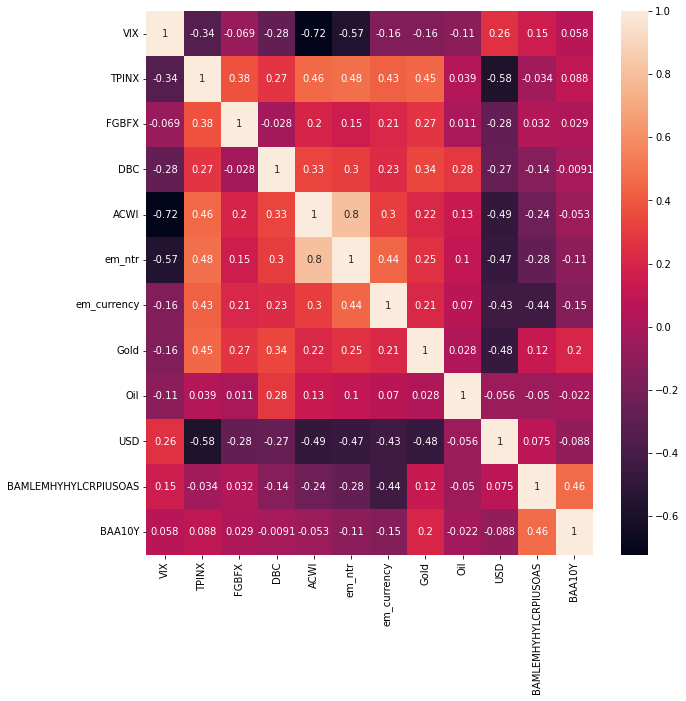

In [403]:
x_var=data.drop(columns=['Sol_Price'])
y_var=data['Sol_Price']
corr = x_var.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr, annot=True)
plt.show()

In [404]:
import statsmodels.formula.api as smf

reg = smf.ols('Sol_Price ~ VIX+TPINX+FGBFX+DBC+ACWI+em_ntr+em_currency+Gold+Oil+USD+BAMLEMHYHYLCRPIUSOAS+BAA10Y', data=data)
reg_result = reg.fit()
reg_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Sol_Price   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     7.874
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           6.81e-14
Time:                        20:54:41   Log-Likelihood:                 816.14
No. Observations:                 716   AIC:                            -1606.
Df Residuals:                     703   BIC:                            -1547.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0037      0.003      1.250      0.212      -0.002       0.010
VIX                     -0.0580      0.054     -1.066      0.287      -0.165       0.049
TPINX                    0.2722      1.028      0.265      0.791      -1.745       2.290
FGBFX                   -0.7519      0.998     -0.753      0.452      -2.712       1.208
DBC                     -0.0425      0.253     -0.168      0.867      -0.539       0.454
ACWI                     1.6814      0.539      3.120      0.002       0.623       2.740
em_ntr                   0.3078      0.403      0.765      0.445      -0.483       1.098
em_currency              0.0319      1.548      0.021      0.984      -3.007       3.071
Gold                     0.2145      0.387      0.554      0.580      -0.546       0.975
Oil                      0.0124      0.024      0.522      0.602      -0.034       0.059
USD                     -0.7210      0.925     -0.779      0.436      -2.537       1.095
BAMLEMHYHYLCRPIUSOAS     0.4602      0.276      1.665      0.096      -0.082       1.003
BAA10Y                  -0.3335      0.227     -1.469      0.142      -0.779       0.112
==============================================================================
Omnibus:                       97.132   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              542.027
Skew:                           0.450   Prob(JB):                    2.00e-118
Kurtosis:                       7.166   Cond. No.                         548.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### if to deal with multicollinearity

In [405]:
# This is the summary table function I got from Mehdi
#https://stackoverflow.com/questions/40072870/statistical-summary-table-in-sklearn-linear-model-ridge
from statsmodels.tools.tools import pinv_extended
import statsmodels.api as sm
import sklearn, statsmodels

def regression_analysis(X, y, model):
    
    is_statsmodels = False
    is_sklearn = False
    
    # check for accepted linear models
    if type(model) in [sklearn.linear_model._base.LinearRegression,
                       sklearn.linear_model._ridge.Ridge,
                       sklearn.linear_model._ridge.RidgeCV,
                       sklearn.linear_model._coordinate_descent.Lasso,
                       sklearn.linear_model._coordinate_descent.LassoCV,
                       sklearn.linear_model._coordinate_descent.ElasticNet,
                       sklearn.linear_model._coordinate_descent.ElasticNetCV,
                      ]:
        is_sklearn = True
    elif type(model) in [statsmodels.regression.linear_model.OLS, 
                         statsmodels.base.elastic_net.RegularizedResults,
                        ]:
        is_statsmodels = True
    else:
        print("Only linear models are supported!")
        return None
    
    
    
    has_intercept = False
    
    if is_statsmodels and all(np.array(X)[:,0]==1):
        # statsmodels add_constant has been used already
        has_intercept = True  
    elif is_sklearn and model.intercept_:
        has_intercept = True
        

    
    if is_statsmodels:
        # add_constant has been used already
        x = X
        model_params = model.params
    else: # sklearn model
        if has_intercept:
            x = sm.add_constant(X)
            model_params = np.hstack([np.array([model.intercept_]), model.coef_])
        else:
            x = X
            model_params = model.coef_
        
    #y = np.array(y).ravel()
    
    # define the OLS model
    olsModel = sm.OLS(y, x)
    
    pinv_wexog,_ = pinv_extended(x)
    normalized_cov_params = np.dot(pinv_wexog, np.transpose(pinv_wexog))
    
    
    return sm.regression.linear_model.OLSResults(olsModel, model_params, normalized_cov_params)
    

In [406]:
#Ridge
from sklearn.linear_model import LinearRegression, Ridge, Lasso

ridge=Ridge()
ridge.fit(x_var, y_var)

rdg_result = regression_analysis(x_var,y_var,ridge)
rdg_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Sol_Price   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     5.021
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           4.77e-08
Time:                        20:54:49   Log-Likelihood:                 800.43
No. Observations:                 716   AIC:                            -1575.
Df Residuals:                     703   BIC:                            -1515.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0047      0.003      1.548      0.122      -0.001       0.011
VIX                     -0.2013      0.056     -3.618      0.000      -0.311      -0.092
TPINX                    0.0217      1.050      0.021      0.983      -2.040       2.084
FGBFX                    0.0060      1.020      0.006      0.995      -1.998       2.010
DBC                      0.0326      0.258      0.126      0.900      -0.475       0.540
ACWI                     0.1038      0.551      0.188      0.851      -0.978       1.185
em_ntr                   0.1062      0.411      0.258      0.796      -0.702       0.914
em_currency              0.0079      1.582      0.005      0.996      -3.099       3.115
Gold                     0.0356      0.396      0.090      0.928      -0.742       0.813
Oil                      0.0196      0.024      0.807      0.420      -0.028       0.067
USD                     -0.0323      0.946     -0.034      0.973      -1.889       1.824
BAMLEMHYHYLCRPIUSOAS     0.0068      0.283      0.024      0.981      -0.548       0.562
BAA10Y                  -0.0187      0.232     -0.080      0.936      -0.474       0.437
==============================================================================
Omnibus:                      101.300   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              646.048
Skew:                           0.431   Prob(JB):                    5.16e-141
Kurtosis:                       7.573   Cond. No.                         548.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [407]:
#Lasso
lasso=Lasso()
lasso.fit(x_var, y_var)

las_result = regression_analysis(x_var,y_var,lasso)
las_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Sol_Price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                     0.000
Date:                Thu, 23 Mar 2023   Prob (F-statistic):               1.00
Time:                        20:54:56   Log-Likelihood:                 770.99
No. Observations:                 716   AIC:                            -1516.
Df Residuals:                     703   BIC:                            -1457.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0043      0.003      1.367      0.172      -0.002       0.011
VIX                          -0      0.058         -0      1.000      -0.114       0.114
TPINX                         0      1.094          0      1.000      -2.149       2.149
FGBFX                         0      1.063          0      1.000      -2.088       2.088
DBC                           0      0.269          0      1.000      -0.529       0.529
ACWI                          0      0.574          0      1.000      -1.127       1.127
em_ntr                        0      0.429          0      1.000      -0.842       0.842
em_currency                   0      1.649          0      1.000      -3.237       3.237
Gold                          0      0.412          0      1.000      -0.810       0.810
Oil                           0      0.025          0      1.000      -0.050       0.050
USD                          -0      0.985         -0      1.000      -1.935       1.935
BAMLEMHYHYLCRPIUSOAS         -0      0.294         -0      1.000      -0.578       0.578
BAA10Y                       -0      0.242         -0      1.000      -0.475       0.475
==============================================================================
Omnibus:                       96.694   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              561.124
Skew:                           0.431   Prob(JB):                    1.42e-122
Kurtosis:                       7.250   Cond. No.                         548.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## PCA: Finding the common drivers

In [408]:
#!pip install factor_analyzer
import factor_analyzer

In [409]:
# some functions to format PCA results
def get_loadings_communalities(pca,round_dig=2,index_names=None):
  '''Returns a DataFrame containings the loadings'''
  df = pd.DataFrame(
      pca.loadings_,
      index=index_names if index_names else [f'q{i}' for i in range(1,1+pca.loadings_.shape[0])],
      columns=[f'RC{i}' for i in range(1,1+pca.loadings_.shape[1])] if pca.rotation else [f'PC{i}' for i in range(1,1+pca.loadings_.shape[1])]
      )
  if pca.rotation:
    df['communalities']=pca.get_communalities()
  df=df.round(3)
  return  df

def get_summary(pca,round_dig=2):
  ''' Print a summary of the PCA fit '''
  return pd.DataFrame(
      [pca.get_factor_variance()[0],
       pca.get_factor_variance()[1],
       pca.get_factor_variance()[2]],
       columns=['PC{}'.format(i) for i in
                range(1,1+len(pca.get_factor_variance()[0]))],
      index=['Sum of Squared Loadings','Proportion of Variance Explained',
             'Cumulative Proportion']
            ).round(round_dig)

Adding variables

In [410]:
Solana= yf.download('SOL-USD',period='36mo',ignore_tz=True)
Solana['Date']=Solana.index
Solana['Date'] = pd.to_datetime(Solana['Date']).dt.date
Solana.set_index('Date', inplace=True)
Solana['Solana']=Solana['Adj Close'].pct_change()
Solana=Solana[['Solana']]

[*********************100%***********************]  1 of 1 completed


In [411]:
Polygon= yf.download('MATIC-USD',period='36mo',ignore_tz=True)
Polygon['Date']=Polygon.index
Polygon['Date'] = pd.to_datetime(Polygon['Date']).dt.date
Polygon.set_index('Date', inplace=True)
Polygon['Polygon']=Polygon['Adj Close'].pct_change()
Polygon=Polygon[['Polygon']]

[*********************100%***********************]  1 of 1 completed


In [412]:
Ethereum=yf.download('ETH-USD',period='36mo',ignore_tz=True)
Ethereum['Date']=Ethereum.index
Ethereum['Date'] = pd.to_datetime(Ethereum['Date']).dt.date
Ethereum.set_index('Date', inplace=True)
Ethereum['Ethereum']=Ethereum['Adj Close'].pct_change()
Ethereum=Ethereum[['Ethereum']]

[*********************100%***********************]  1 of 1 completed


In [413]:
Bitcoin=yf.download('BTC-USD',period='36mo',ignore_tz=True)
Bitcoin['Date']=Bitcoin.index
Bitcoin['Date'] = pd.to_datetime(Bitcoin['Date']).dt.date
Bitcoin.set_index('Date', inplace=True)
Bitcoin['Bitcoin']=Bitcoin['Adj Close'].pct_change()
Bitcoin=Bitcoin[['Bitcoin']]

[*********************100%***********************]  1 of 1 completed


In [414]:
Gold= yf.download('GLD',period='36mo',ignore_tz=True)
Gold['Date']=Gold.index
Gold['Date'] = pd.to_datetime(Gold['Date']).dt.date
Gold.set_index('Date', inplace=True)
Gold['Gold']=Gold['Adj Close'].pct_change()
Gold=Gold[['Gold']]

[*********************100%***********************]  1 of 1 completed


In [415]:
USD= yf.download('DX-Y.NYB',period='36mo',ignore_tz=True)
USD['Date']=USD.index
USD['Date'] = pd.to_datetime(USD['Date']).dt.date
USD.set_index('Date', inplace=True)
USD['USD']=USD['Adj Close'].pct_change()
USD=USD[['USD']]

[*********************100%***********************]  1 of 1 completed


In [ ]:
#adding other coins used in 2 sigma's article

In [416]:
XRP= yf.download('XRP-USD',period='36mo',ignore_tz=True)
XRP['Date']=XRP.index
XRP['Date'] = pd.to_datetime(XRP['Date']).dt.date
XRP.set_index('Date', inplace=True)
XRP['XRP']=XRP['Adj Close'].pct_change()
XRP=XRP[['XRP']]

[*********************100%***********************]  1 of 1 completed


In [417]:
Dogcoin= yf.download('DOGE-USD',period='36mo',ignore_tz=True)
Dogcoin['Date']=Dogcoin.index
Dogcoin['Date']=pd.to_datetime(Dogcoin['Date']).dt.date
Dogcoin.set_index('Date', inplace=True)
Dogcoin['Dogcoin']=Dogcoin['Adj Close'].pct_change()
Dogcoin=Dogcoin[['Dogcoin']]

[*********************100%***********************]  1 of 1 completed


In [418]:
Cardano= yf.download('ADA-USD',period='36mo',ignore_tz=True)
Cardano['Date']=Cardano.index
Cardano['Date'] = pd.to_datetime(Cardano['Date']).dt.date
Cardano.set_index('Date', inplace=True)
Cardano['Cardano']=Cardano['Adj Close'].pct_change()
Cardano=Cardano[['Cardano']]

[*********************100%***********************]  1 of 1 completed


In [419]:
TRON= yf.download('TRX-USD',period='36mo',ignore_tz=True)
TRON['Date']=TRON.index
TRON['Date'] = pd.to_datetime(TRON['Date']).dt.date
TRON.set_index('Date', inplace=True)
TRON['TRON']=TRON['Adj Close'].pct_change()
TRON=TRON[['TRON']]

[*********************100%***********************]  1 of 1 completed


In [420]:
Litecoin= yf.download('LTC-USD',period='36mo',ignore_tz=True)
Litecoin['Date']=Litecoin.index
Litecoin['Date'] = pd.to_datetime(Litecoin['Date']).dt.date
Litecoin.set_index('Date', inplace=True)
Litecoin['Litecoin']=Litecoin['Adj Close'].pct_change()
Litecoin=Litecoin[['Litecoin']]

[*********************100%***********************]  1 of 1 completed


In [421]:
Binance_Coin= yf.download('BNB-USD',period='36mo',ignore_tz=True)
Binance_Coin['Date']=Binance_Coin.index
Binance_Coin['Date'] = pd.to_datetime(Binance_Coin['Date']).dt.date
Binance_Coin.set_index('Date', inplace=True)
Binance_Coin['Binance_Coin']=Binance_Coin['Adj Close'].pct_change()
Binance_Coin=Binance_Coin[['Binance_Coin']]

[*********************100%***********************]  1 of 1 completed


In [422]:
EOS= yf.download('EOS-USD',period='36mo',ignore_tz=True)
EOS['Date']=EOS.index
EOS['Date'] = pd.to_datetime(EOS['Date']).dt.date
EOS.set_index('Date', inplace=True)
EOS['EOS']=EOS['Adj Close'].pct_change()
EOS=EOS[['EOS']]

[*********************100%***********************]  1 of 1 completed


In [423]:
data2=pd.concat([Solana,Polygon,Ethereum,Gold,USD,XRP,Dogcoin,Cardano,TRON,Litecoin,Binance_Coin,EOS],axis=1,join = 'inner')
data2

,Solana,Polygon,Ethereum,Gold,USD,XRP,Dogcoin,Cardano,TRON,Litecoin,Binance_Coin,EOS
Date,,,,,,,,,,,,
2020-04-13,-0.118611,-0.027776,-0.030177,0.017140,-0.001708,-0.012638,-0.015578,-0.020677,-0.024570,-0.029351,0.045865,-0.035048
2020-04-14,-0.149013,0.012910,0.008426,0.007868,-0.004630,-0.012768,0.002552,-0.004017,-0.013667,-0.003653,0.032635,0.004595
2020-04-15,-0.023075,-0.043664,-0.027345,-0.005102,0.005764,-0.021933,-0.012220,-0.033693,-0.015145,-0.035679,-0.059977,-0.022096
2020-04-16,0.068298,0.086930,0.123106,-0.000865,0.005731,0.048734,0.045361,0.079873,0.066830,0.078303,0.075977,0.105601
2020-04-17,-0.043554,0.014714,-0.003014,-0.019417,-0.002499,0.000516,-0.007397,0.004795,-0.002914,0.001312,0.002060,-0.006401
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-16,0.022786,0.032760,0.012701,0.002020,-0.002198,0.015163,0.040821,0.002298,0.000827,0.034351,0.074028,0.039090
2023-03-17,0.096224,0.064091,0.068727,0.029120,-0.006799,0.039224,0.052133,0.077266,0.037144,0.081575,0.027952,0.061322
2023-03-20,0.012467,-0.055485,-0.028145,0.000381,-0.004146,-0.035620,-0.044457,-0.038771,-0.024832,-0.071196,-0.012034,-0.005142


In [424]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 742 entries, 2020-04-13 to 2023-03-22
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Solana        742 non-null    float64
 1   Polygon       742 non-null    float64
 2   Ethereum      742 non-null    float64
 3   Gold          742 non-null    float64
 4   USD           742 non-null    float64
 5   XRP           742 non-null    float64
 6   Dogcoin       742 non-null    float64
 7   Cardano       742 non-null    float64
 8   TRON          742 non-null    float64
 9   Litecoin      742 non-null    float64
 10  Binance_Coin  742 non-null    float64
 11  EOS           742 non-null    float64
dtypes: float64(12)
memory usage: 75.4+ KB


In [425]:
data2.isnull().sum()

Solana          0
Polygon         0
Ethereum        0
Gold            0
USD             0
XRP             0
Dogcoin         0
Cardano         0
TRON            0
Litecoin        0
Binance_Coin    0
EOS             0
dtype: int64

In [426]:
data2.shape

(742, 12)

In [427]:
data2_pca= factor_analyzer.FactorAnalyzer(n_factors=data2.shape[1],
                                          rotation=None,
                                          method='principal').fit(data2)

In [428]:
get_summary(data2_pca)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
Sum of Squared Loadings,6.14,1.40,0.93,0.67,0.52,0.48,0.39,0.37,0.37,0.32,0.25,0.16
Proportion of Variance Explained,0.51,0.12,0.08,0.06,0.04,0.04,0.03,0.03,0.03,0.03,0.02,0.01
Cumulative Proportion,0.51,0.63,0.71,0.76,0.81,0.84,0.88,0.91,0.94,0.97,0.99,1.00


Text(0, 0.5, 'Variance')

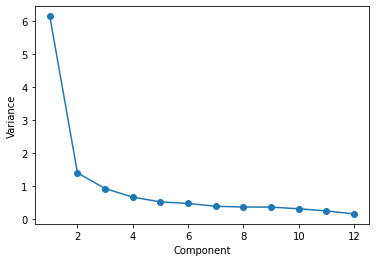

In [434]:
# scree plot - shows successive proportion of additional variance that each component adds
plt.plot(1+np.arange(len(data2_pca.get_factor_variance()[0])),
         data2_pca.get_factor_variance()[0],'o-')
plt.xlabel('Component')
plt.ylabel('Variance')

# if we choose 2 factors

In [430]:
data2_pca_rotated_2factors=factor_analyzer.FactorAnalyzer(n_factors=2,
                                          rotation='varimax',
                                          method='principal').fit(data2)

In [431]:
#get loadings
get_loadings_communalities(data2_pca_rotated_2factors,index_names=list(data2.columns))

,RC1,RC2,communalities
Solana,0.661,0.126,0.453
Polygon,0.776,0.108,0.613
Ethereum,0.888,0.131,0.805
Gold,0.042,0.866,0.752
USD,-0.156,-0.842,0.734
XRP,0.792,-0.006,0.628
Dogcoin,0.369,0.020,0.137
Cardano,0.828,0.108,0.698
TRON,0.775,0.048,0.603
Litecoin,0.876,0.118,0.782


# if we choose 10 factors

In [432]:
data2_pca_rotated_5factors=factor_analyzer.FactorAnalyzer(n_factors=10,
                                          rotation='varimax',
                                          method='principal').fit(data2)

#get loadings
get_loadings_communalities(data2_pca_rotated_5factors,index_names=list(data2.columns))

,RC1,RC2,RC3,RC4,RC5,RC6,RC7,RC8,RC9,RC10,communalities
Solana,0.267,0.037,0.054,0.903,-0.068,0.123,0.103,0.153,0.161,0.129,0.987
Polygon,0.378,0.027,0.033,0.203,-0.084,0.157,0.157,0.825,0.217,0.167,0.997
Ethereum,0.733,0.052,0.115,0.329,-0.089,0.117,0.203,0.265,0.193,0.188,0.867
Gold,0.055,0.967,0.008,0.032,-0.241,-0.000,0.032,0.019,0.030,0.018,1.000
USD,-0.103,-0.252,-0.033,-0.062,0.955,-0.029,-0.027,-0.059,-0.033,-0.049,1.000
XRP,0.434,-0.004,0.101,0.166,-0.040,0.812,0.211,0.161,0.138,0.138,0.996
Dogcoin,0.160,0.008,0.978,0.049,-0.031,0.065,0.064,0.026,0.038,0.066,1.000
Cardano,0.463,0.032,0.127,0.219,-0.088,0.171,0.185,0.215,0.191,0.753,0.999
TRON,0.407,0.046,0.093,0.134,-0.034,0.197,0.830,0.153,0.167,0.140,0.995
Litecoin,0.828,0.040,0.141,0.215,-0.100,0.208,0.128,0.155,0.196,0.134,0.904
